<a href="https://colab.research.google.com/github/Avinda04/UAS-AI/blob/main/Klasifikasi_obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


In [1]:

# Klasifikasi Obesitas menggunakan KNN
# Dibuat oleh:


In [2]:

!git clone https://github.com/Avinda04/UAS-AI.git

Cloning into 'UAS-AI'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 407.38 KiB | 5.66 MiB/s, done.
Resolving deltas: 100% (7/7), done.


<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL raw dari file dataset
dataset_file = "https://raw.githubusercontent.com/Avinda04/UAS-AI/main/Dataset/Obesity%20Classification.csv"
data = pd.read_csv(dataset_file)


In [7]:
# Menampilkan 5 baris pertama dari dataset
print(data.head())


   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [8]:

# Menampilkan informasi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None


In [9]:

# Memeriksa duplikat
duplicates = data.duplicated().sum()
print(f'Duplikat: {duplicates}')

Duplikat: 0


In [10]:


# Memeriksa nilai kosong
null_values = data.isnull().sum()
print(f'Nilai Null:\n{null_values}')

Nilai Null:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [11]:


# Menghapus duplikat
data = data.drop_duplicates()

In [12]:

# Menghapus baris dengan nilai kosong
data = data.dropna()

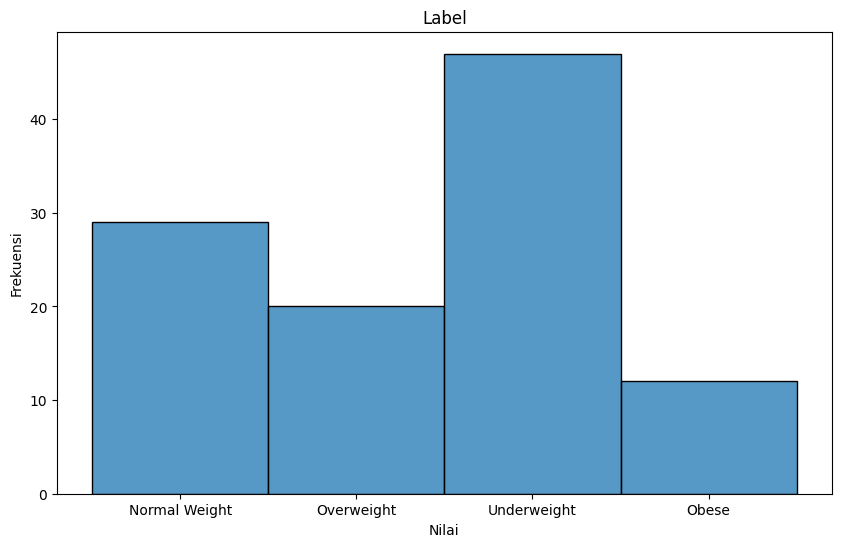

In [13]:

# Contoh visualisasi: Histogram dari kolom tertentu
plt.figure(figsize=(10, 6))
sns.histplot(data['Label'], bins=30)
plt.title('Label')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

5 Baris Pertama dari Dataset:
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None

Jumlah Duplikat: 0

Nilai Null:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label

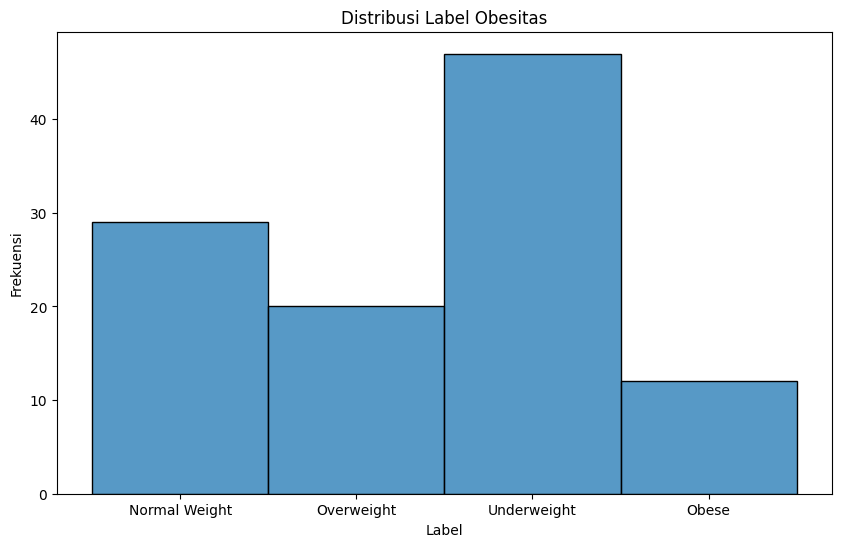

In [14]:

# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Memuat Dataset
dataset_file = "https://raw.githubusercontent.com/putraalex-1/UAS-AI/main/DATASET/Obesity%20Classification.csv"
data = pd.read_csv(dataset_file)

# 2. Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama dari Dataset:")
print(data.head())

# 3. Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(data.info())

# 4. Memeriksa duplikat
duplicates = data.duplicated().sum()
print(f'\nJumlah Duplikat: {duplicates}')

# 5. Memeriksa nilai kosong
null_values = data.isnull().sum()
print(f'\nNilai Null:\n{null_values}')

# 6. Menghapus duplikat
data = data.drop_duplicates()

# 7. Menghapus baris dengan nilai kosong
data = data.dropna()

# 8. Mengubah variabel kategorikal 'Gender' menjadi variabel numerik
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# 9. Memisahkan fitur dan label
X = data.drop(columns=['ID', 'Label'])  # Menghapus kolom ID dan Label dari fitur
y = data['Label']  # Label adalah kolom 'Label'

# 10. Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the indices of the test set before transforming it.
test_indices = X_test.index

# 11. Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 12. Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mengubah n_neighbors sesuai kebutuhan

# 13. Melatih model
knn.fit(X_train, y_train)

# 14. Melakukan prediksi
y_pred = knn.predict(X_test)

# 15. Evaluasi model
print("\nMatriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# 16. Mengambil ID dari data uji, now using the saved test index.
test_ids = data.loc[test_indices, 'ID']

# 17. Membuat DataFrame untuk hasil prediksi
results = pd.DataFrame({
    'ID': test_ids,
    'Label Aktual': y_test,
    'Label Prediksi': y_pred
})

# 18. Menampilkan tabel hasil
print("\nHasil Prediksi:")
print(results)

# 19. Jika ingin menyimpan hasil ke file CSV
results.to_csv('hasil_prediksi_knn.csv', index=False)

# 20. Contoh visualisasi: Histogram dari kolom tertentu
plt.figure(figsize=(10, 6))
sns.histplot(data['Label'], bins=30)
plt.title('Distribusi Label Obesitas')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.show()

5 Baris Pertama dari Dataset:
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None

Jumlah Duplikat: 0

Nilai Null:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label

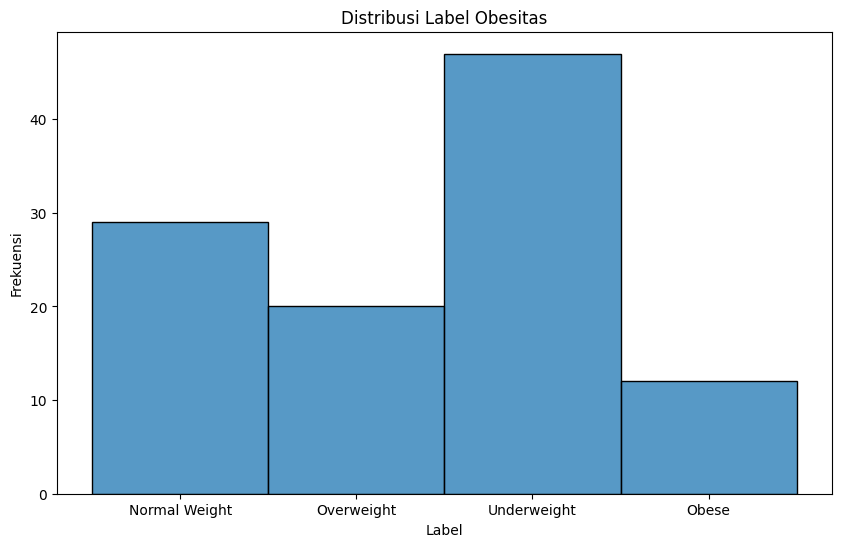

In [15]:

# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Memuat Dataset
dataset_file = "https://raw.githubusercontent.com/putraalex-1/UAS-AI/main/DATASET/Obesity%20Classification.csv"
data = pd.read_csv(dataset_file)

# 2. Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama dari Dataset:")
print(data.head())

# 3. Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(data.info())

# 4. Memeriksa duplikat
duplicates = data.duplicated().sum()
print(f'\nJumlah Duplikat: {duplicates}')

# 5. Memeriksa nilai kosong
null_values = data.isnull().sum()
print(f'\nNilai Null:\n{null_values}')

# 6. Menghapus duplikat
data = data.drop_duplicates()

# 7. Menghapus baris dengan nilai kosong
data = data.dropna()

# 8. Mengubah variabel kategorikal 'Gender' menjadi variabel numerik
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# 9. Memisahkan fitur dan label
X = data.drop(columns=['ID', 'Label'])  # Menghapus kolom ID dan Label dari fitur
y = data['Label']  # Label adalah kolom 'Label'

# 10. Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the indices of the test set before transforming it.
test_indices = X_test.index

# 11. Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 12. Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mengubah n_neighbors sesuai kebutuhan

# 13. Melatih model
knn.fit(X_train, y_train)

# 14. Melakukan prediksi
y_pred = knn.predict(X_test)

# 15. Evaluasi model
print("\nMatriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# 16. Mengambil ID dari data uji, now using the saved test index.
test_ids = data.loc[test_indices, 'ID']

# 17. Membuat DataFrame untuk hasil prediksi
results = pd.DataFrame({
    'ID': test_ids,
    'Label Aktual': y_test,
    'Label Prediksi': y_pred
})

# 18. Menampilkan tabel hasil
print("\nHasil Prediksi:")
print(results)

# 19. Jika ingin menyimpan hasil ke file CSV
results.to_csv('hasil_prediksi_knn.csv', index=False)

# 20. Contoh visualisasi: Histogram dari kolom tertentu
plt.figure(figsize=(10, 6))
sns.histplot(data['Label'], bins=30)
plt.title('Distribusi Label Obesitas')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.show()

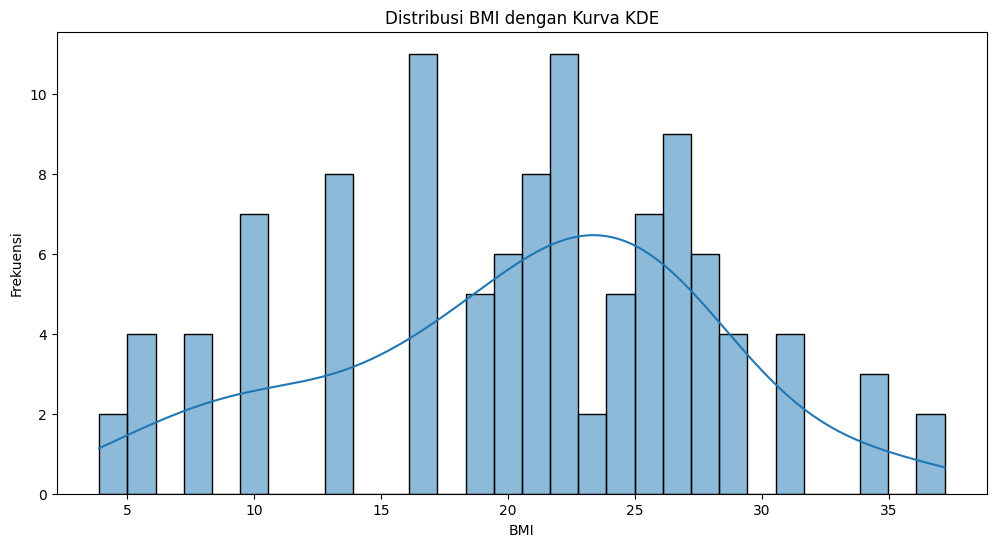

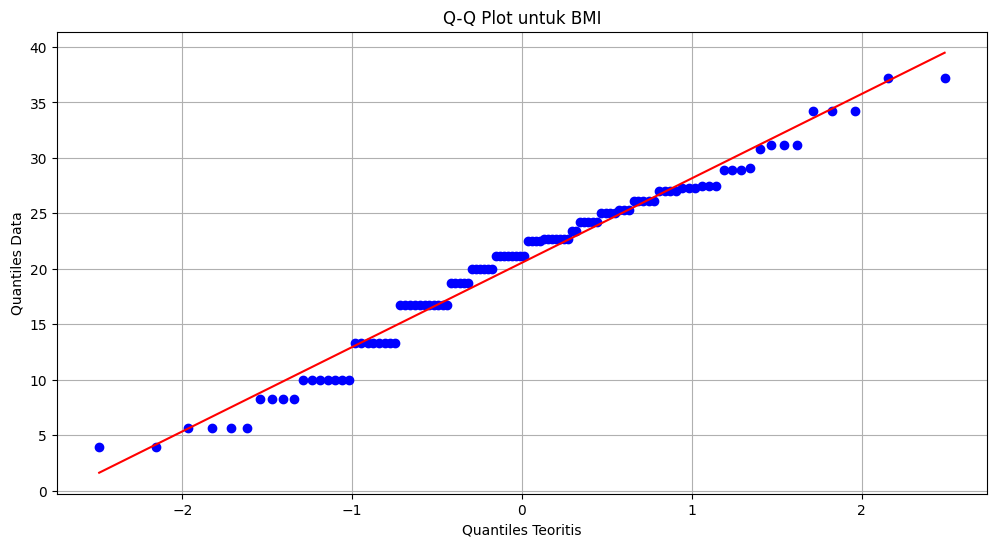

Shapiro-Wilk Test: Statistic=0.9739785341462815, p-value=0.032366522450285644
Data tidak mengikuti distribusi normal (menolak H0)


In [16]:

# Import distriibusi normal
import scipy.stats as stats

# 1. Visualisasi Histogram dan Kurva KDE
plt.figure(figsize=(12, 6))
sns.histplot(data['BMI'], kde=True, bins=30)
plt.title('Distribusi BMI dengan Kurva KDE')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(data['BMI'], dist="norm", plot=plt)
plt.title('Q-Q Plot untuk BMI')
plt.xlabel('Quantiles Teoritis')
plt.ylabel('Quantiles Data')
plt.grid()
plt.show()

# 3. Uji Normalitas (Shapiro-Wilk)
shapiro_test = stats.shapiro(data['BMI'])
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Interpretasi hasil uji normalitas
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Data mengikuti distribusi normal (gagal menolak H0)")
else:
    print("Data tidak mengikuti distribusi normal (menolak H0)")

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

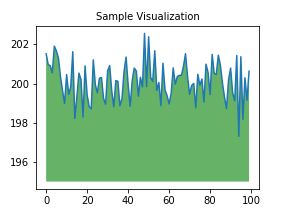

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

In [ ]:

# Klasifikasi Obesitas menggunakan KNN
# Dibuat oleh:

In [ ]:
!git clone https://github.com/Avinda04/UAS-AI.git

Cloning into 'UAS-AI'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
Receiving objects: 100% (13/13), 4.58 KiB | 4.58 MiB/s, done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Resolving deltas: 100% (1/1), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL raw dari file dataset
dataset_file = "https://raw.githubusercontent.com/Avinda04/UAS-AI/main/Dataset/Obesity%20Classification.csv"
data = pd.read_csv(dataset_file)

In [ ]:
# Menampilkan 5 baris pertama dari dataset
print(data.head())

   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese


In [ ]:
# Menampilkan informasi dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None


In [ ]:
# Memeriksa duplikat
duplicates = data.duplicated().sum()
print(f'Duplikat: {duplicates}')

Duplikat: 0


In [ ]:
# Memeriksa nilai kosong
null_values = data.isnull().sum()
print(f'Nilai Null:\n{null_values}')

Nilai Null:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [ ]:
# Menghapus duplikat
data = data.drop_duplicates()

In [ ]:
# Menghapus baris dengan nilai kosong
data = data.dropna()

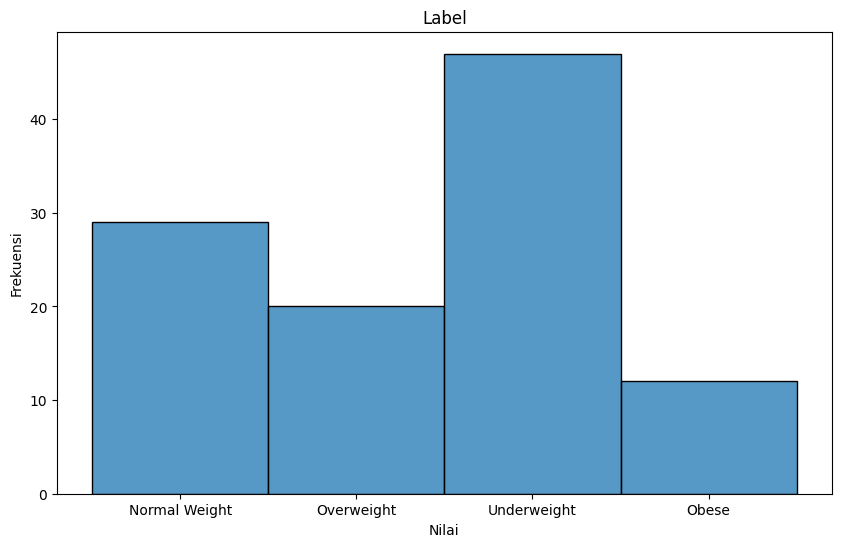

In [ ]:
# Contoh visualisasi: Histogram dari kolom tertentu
plt.figure(figsize=(10, 6))
sns.histplot(data['Label'], bins=30)
plt.title('Label')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

5 Baris Pertama dari Dataset:
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None

Jumlah Duplikat: 0

Nilai Null:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label

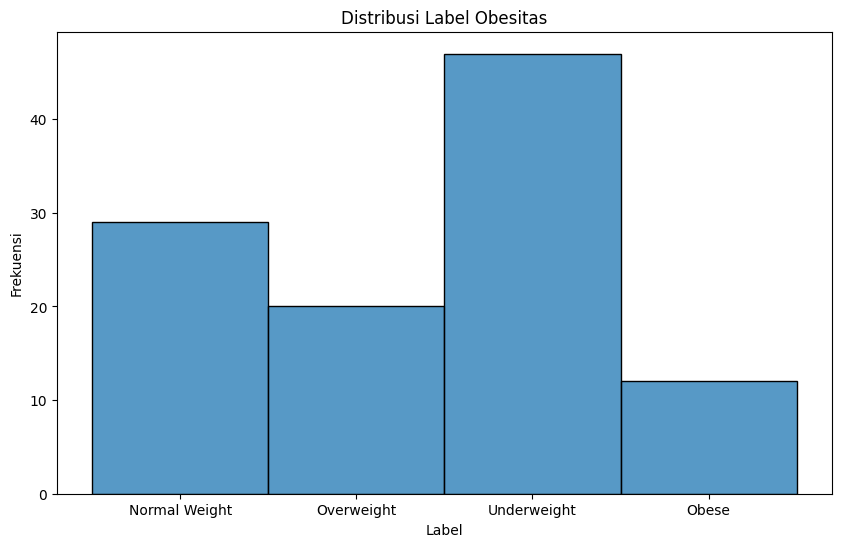

In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Memuat Dataset
dataset_file = "https://raw.githubusercontent.com/Avinda04/UAS-AI/main/Dataset/Obesity%20Classification.csv"
data = pd.read_csv(dataset_file)

# 2. Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama dari Dataset:")
print(data.head())

# 3. Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(data.info())

# 4. Memeriksa duplikat
duplicates = data.duplicated().sum()
print(f'\nJumlah Duplikat: {duplicates}')

# 5. Memeriksa nilai kosong
null_values = data.isnull().sum()
print(f'\nNilai Null:\n{null_values}')

# 6. Menghapus duplikat
data = data.drop_duplicates()

# 7. Menghapus baris dengan nilai kosong
data = data.dropna()

# 8. Mengubah variabel kategorikal 'Gender' menjadi variabel numerik
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# 9. Memisahkan fitur dan label
X = data.drop(columns=['ID', 'Label'])  # Menghapus kolom ID dan Label dari fitur
y = data['Label']  # Label adalah kolom 'Label'

# 10. Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the indices of the test set before transforming it.
test_indices = X_test.index

# 11. Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 12. Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mengubah n_neighbors sesuai kebutuhan

# 13. Melatih model
knn.fit(X_train, y_train)

# 14. Melakukan prediksi
y_pred = knn.predict(X_test)

# 15. Evaluasi model
print("\nMatriks Kebingungan:")
print(confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# 16. Mengambil ID dari data uji, now using the saved test index.
test_ids = data.loc[test_indices, 'ID']

# 17. Membuat DataFrame untuk hasil prediksi
results = pd.DataFrame({
    'ID': test_ids,
    'Label Aktual': y_test,
    'Label Prediksi': y_pred
})

# 18. Menampilkan tabel hasil
print("\nHasil Prediksi:")
print(results)

# 19. Jika ingin menyimpan hasil ke file CSV
results.to_csv('hasil_prediksi_knn.csv', index=False)

# 20. Contoh visualisasi: Histogram dari kolom tertentu
plt.figure(figsize=(10, 6))
sns.histplot(data['Label'], bins=30)
plt.title('Distribusi Label Obesitas')
plt.xlabel('Label')
plt.ylabel('Frekuensi')
plt.show()

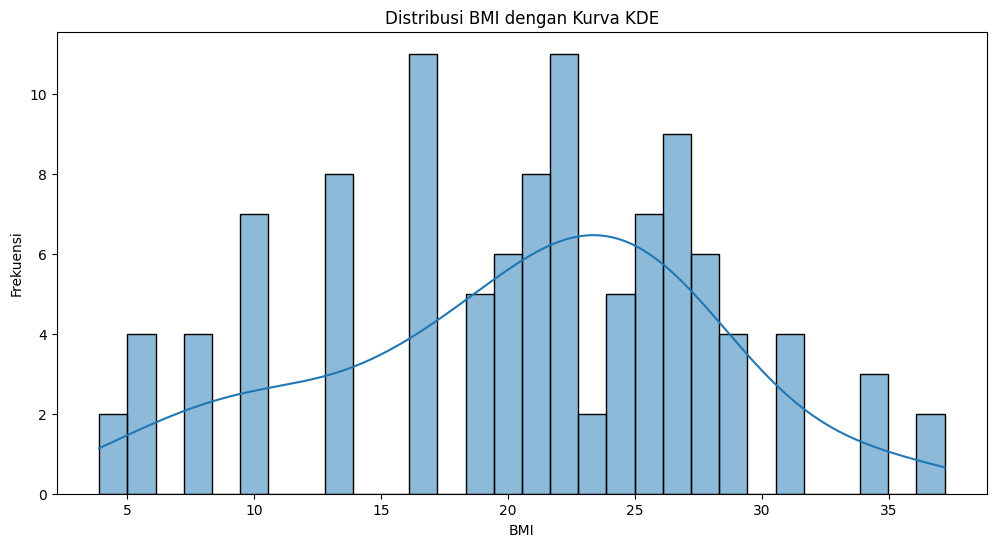

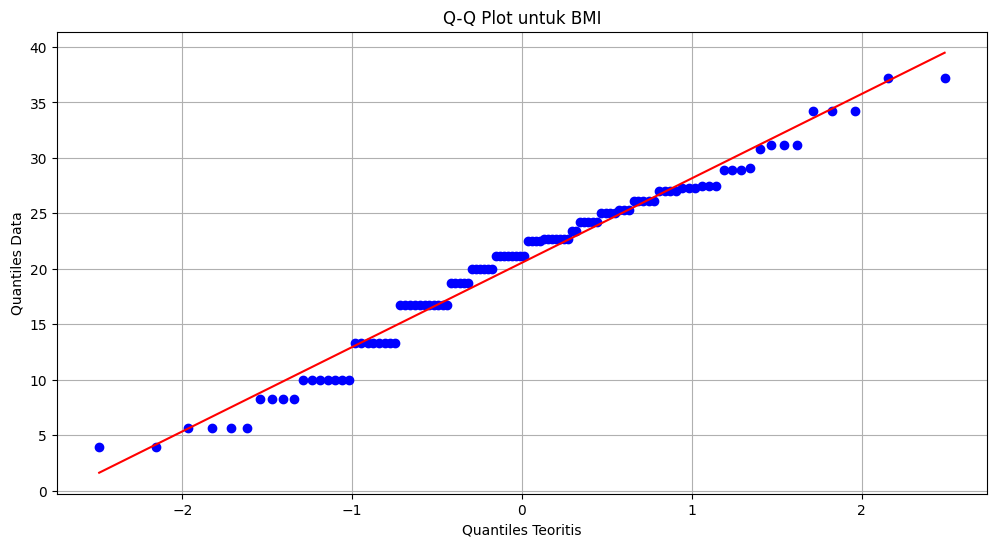

Shapiro-Wilk Test: Statistic=0.9739785341462815, p-value=0.032366522450285644
Data tidak mengikuti distribusi normal (menolak H0)


In [ ]:
# Import distriibusi normal
import scipy.stats as stats

# 1. Visualisasi Histogram dan Kurva KDE
plt.figure(figsize=(12, 6))
sns.histplot(data['BMI'], kde=True, bins=30)
plt.title('Distribusi BMI dengan Kurva KDE')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(data['BMI'], dist="norm", plot=plt)
plt.title('Q-Q Plot untuk BMI')
plt.xlabel('Quantiles Teoritis')
plt.ylabel('Quantiles Data')
plt.grid()
plt.show()

# 3. Uji Normalitas (Shapiro-Wilk)
shapiro_test = stats.shapiro(data['BMI'])
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Interpretasi hasil uji normalitas
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Data mengikuti distribusi normal (gagal menolak H0)")
else:
    print("Data tidak mengikuti distribusi normal (menolak H0)")

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
